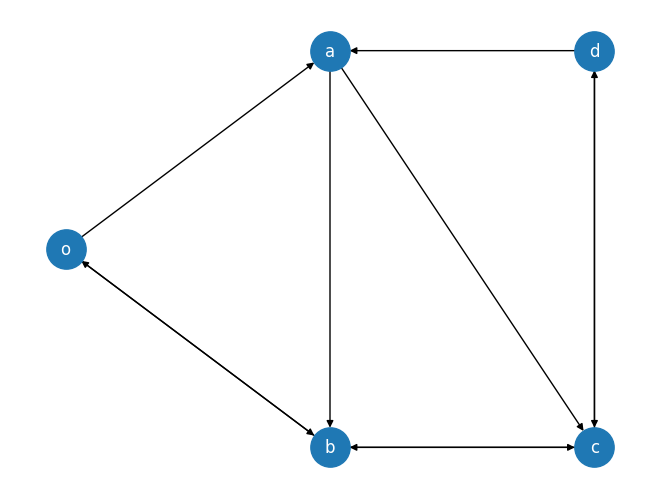

In [ ]:
# PROBLEM 1

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand, uniform

G = nx.DiGraph()

G.add_edge('o','a', weight=2/5)
G.add_edge('o','b', weight=1/5)
G.add_edge('a','b', weight=3/4)
G.add_edge('a','c', weight=1/4)
G.add_edge('b','o', weight=1/2)
G.add_edge('b','c', weight=1/3)
G.add_edge('c','b', weight=1/3)
G.add_edge('c','d', weight=2/3)
G.add_edge('d','a', weight=1/3)
G.add_edge('d','c', weight=1/3)

pos = {
    'o': (0, 0),
    'a': (20, 20),
    'b': (20, -20),
    'c': (40, -20),
    'd': (40, 20),
}

nx.draw(G, pos, with_labels=True, font_color="white", node_size=800)
plt.show()

A=np.array([[0,2/5,1/5,0,0],
            [0,0,3/4,1/4,0],
            [1/2,0,0,1/3,0],
            [0,0,1/3,0,2/3],
            [0,1/3,0,1/3,0]])

w= np.sum(A,1)
D= np.diag(w)
P= np.linalg.inv(D) @ A

wstar = np.max(w)
Pbar = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    if i!=j:
      Pbar[i,j]=A[i,j]/wstar
for i in range(5):
  sum=0
  for j in range(5):
    if i != j:
      sum += Pbar[i,j]
  Pbar[i,i]= 1-sum



def randomWalk(xi, stop_time, stop_at_return= False, stop_at_node= False, target=None):
  visited=[]
  visited.append(xi)
  times=[]

  if stop_at_return:
    while True:
      xi_index= list(G.nodes).index(xi)

      #wait random time
      u= uniform(0.001,1)
      tnext= -np.log(u)/w[xi_index]
      times.append(tnext)

      #choose randomly next state
      xi= choice(G.adj[xi],1,p=P[xi_index,P[xi_index,:]!=0])[0]
      if xi == visited[0]:
        return visited,times
      visited.append(xi)
  elif stop_at_node:
    while True:
      xi_index= list(G.nodes).index(xi)

      #wait random time
      u= uniform(0.001,1)
      tnext= -np.log(u)/w[xi_index]
      times.append(tnext)

      #choose randomly next state
      xi= choice(G.adj[xi],1,p=P[xi_index,P[xi_index,:]!=0])[0]
      if xi == target:
        return visited,times
      visited.append(xi)
  else:
    timer=0

    while True:
      xi_index= list(G.nodes).index(xi)

      #wait random time
      u= uniform(0.001,1)
      tnext= -np.log(u)/w[xi_index]
      timer += tnext
      times.append(tnext)
      if timer >= stop_time:
        return visited, times

      #choose randomly next state
      xi= choice(G.adj[xi],1,p=P[xi_index,P[xi_index,:]!=0])[0]
      visited.append(xi)





In [ ]:
# point a

nodes, times= randomWalk('b', 0,True)
print(nodes)
print(times)

print("\ncomputed return time on first example: ")
ret_time= np.sum(times)
print(ret_time)

times_vector=[]
for i in range(1000):
  n, t= randomWalk('b',0,True)
  times_vector.append(np.sum(t))
avg_return= np.mean(times_vector)
print("\naverage return time: ", avg_return)


['b', 'c']
[0.3770547025665497, 0.25598220966467966]

computed return time on first example: 
0.6330369122312294

average return time:  4.345852063290824


In [ ]:
# point b

# finding pibar Pbar'pibar=pibar

eval, evec= np.linalg.eig(Pbar.T)
pibar= evec[:,2]
pibar=pibar/np.sum(pibar)

b_index= list(G.nodes).index('b')
exp_time=1/(w[b_index]*pibar[b_index])
print("expected return time: ", exp_time)




expected return time:  (4.599999999999998+0j)


In [ ]:
# point c

times_vector=[]
for i in range(1000):
  n, t= randomWalk('o',0,False,True,'d')
  times_vector.append(np.sum(t))
avg_hit= np.mean(times_vector)
print("\naverage hitting time: ", avg_hit)



average hitting time:  10.408527188029138


In [ ]:
# point d

w_inverse= np.ones((4,1))/w[0:4].reshape(4,1)
Ptilde= P[0:4,0:4]
E=np.linalg.inv((np.eye(4,4)-Ptilde)) @ w_inverse
print("\ntheoretical average hitting time: ", E[0,0])


theoretical average hitting time:  10.766666666666666


Is G aperiodic? True
Is G strongly connected? True
We can use French De-Groot theorem
0: x(0): [0.359, 0.359, 0.359, 0.359, 0.359], x: 0.359452 [1 1 1 1 1]
1: x(0): [0.476, 0.476, 0.476, 0.476, 0.476], x: 0.475633 [1 1 1 1 1]
2: x(0): [0.455, 0.455, 0.455, 0.455, 0.455], x: 0.45521 [1 1 1 1 1]
3: x(0): [0.508, 0.508, 0.508, 0.508, 0.508], x: 0.507546 [1 1 1 1 1]
4: x(0): [0.571, 0.571, 0.571, 0.571, 0.571], x: 0.571379 [1 1 1 1 1]
5: x(0): [0.549, 0.549, 0.549, 0.549, 0.549], x: 0.549184 [1 1 1 1 1]
6: x(0): [0.581, 0.581, 0.581, 0.581, 0.581], x: 0.580798 [1 1 1 1 1]
7: x(0): [0.408, 0.408, 0.408, 0.408, 0.408], x: 0.407785 [1 1 1 1 1]
8: x(0): [0.328, 0.328, 0.328, 0.328, 0.328], x: 0.327759 [1 1 1 1 1]
9: x(0): [0.264, 0.264, 0.264, 0.264, 0.264], x: 0.26396 [1 1 1 1 1]


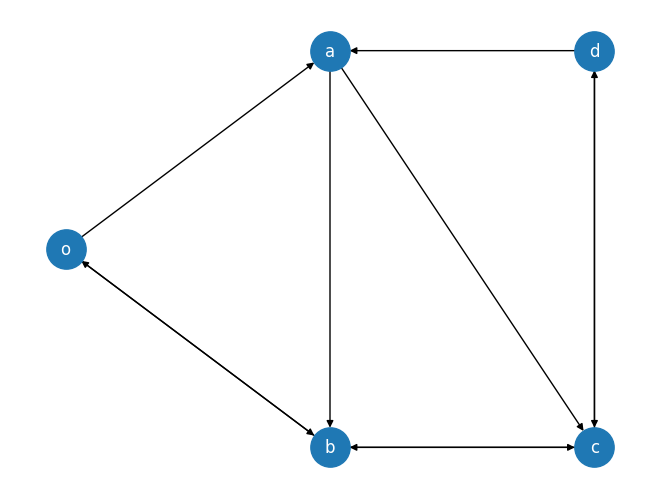

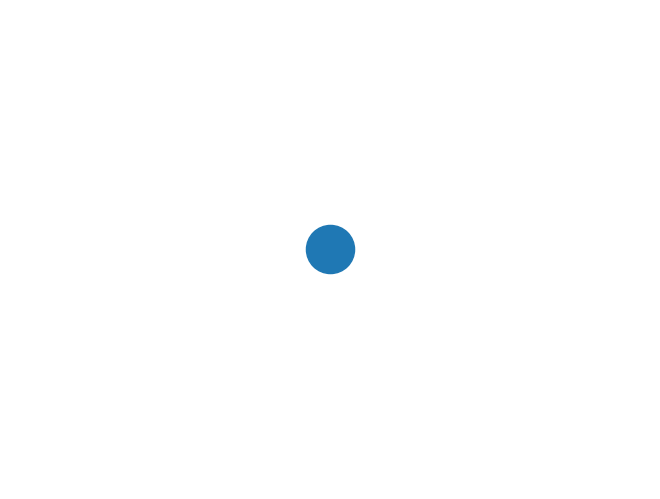

In [ ]:
# Next Part

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand, uniform

G = nx.DiGraph()

G.add_weighted_edges_from([
    ('o','a', 2/5),
    ('o','b', 1/5),
    ('a','b', 3/4),
    ('a','c', 1/4),
    ('b','o', 1/2),
    ('b','c', 1/3),
    ('c','b', 1/3),
    ('c','d', 2/3),
    ('d','a', 1/3),
    ('d','c', 1/3),
])

pos = {
    'o': (0, 0),
    'a': (20, 20),
    'b': (20, -20),
    'c': (40, -20),
    'd': (40, 20),
}


# Point E)

G1 = G.copy()
plt.figure(1)
nx.draw(G1, pos, with_labels=True, font_color="white", node_size=800)

W = nx.adjacency_matrix(G1).toarray()

print("Is G aperiodic?", nx.is_aperiodic(G1))
print("Is G strongly connected?", nx.is_strongly_connected(G1))
print("We can use French De-Groot theorem")

# Dynamics always converge to a consensus state for every initial condition x0.
# (i.e. a1) this is also justified by the fact that G is aperiodic.

degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Prints condensation graph to find out the number of sink components
CG = nx.algorithms.components.condensation(G1)
plt.figure(2)
nx.draw(CG, node_size=1200)

# Since there's only one sink, the only equilibria are the consensus vectors

for i in range(10):
  x = rand(5) # Arbitrary initial condition

  for j in range(100):
    x = P @ x

  print(f"{i}: x(0): {[round(xi, 3) for xi in x]}, x: {round(x[0], 6)} [1 1 1 1 1]")

In [ ]:
from numpy.random import normal

# Point F

consensus_values = []

for i in range(100):
  # Initial condition sampled from gaussians with variances 2, 1, 1, 1, 2. I assumed null mean.
  # C'è sqrt perché la funzione vuole la deviazione standard e non la varianza
  x = np.array([normal(0, np.sqrt(2)), normal(0, 1), normal(0, 1), normal(0, 1), normal(0, np.sqrt(2))])

  for j in range(100):
    x = P @ x

  # Compute the variance of the consensus values
  consensus_values.append(x[0]) # They will be like a * 1 which means each component is identical, this array

# Analytical computation of the variance
w,v = np.linalg.eig(P.T)


for index in [i for i in range(len(G)) if np.isclose(w[i],1)]:
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)
    print("pi: ", pi)

analytical_consensus_variance = 2*pi[0]**2 + pi[1]**2 + pi[2]**2 + pi[3]**2 + 2*pi[4]**2
print("(Analytical) variance between consensuses: ", analytical_consensus_variance) # should be around 0.26

numerical_consensus_variance = np.var(consensus_values)
print("(Numerical)  variance between consensuses: ", numerical_consensus_variance) # should be around 0.26

pi:  [0.16153846 0.18461538 0.26923077 0.23076923 0.15384615]
(Analytical) variance between consensuses:  0.2593491124260356
(Numerical)  variance between consensuses:  0.2720707578364376


Is G aperiodic? True
Is G strongly connected? False
We can't use French De-Groot
W [[0.         0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.33333333 0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.         0.         0.         0.        ]]
Added self-loop in d, new W:
 [[0.         0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.33333333 0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.         0.         0.         1.        ]]
[[1.66666667 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.2        0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]
[[0.         0

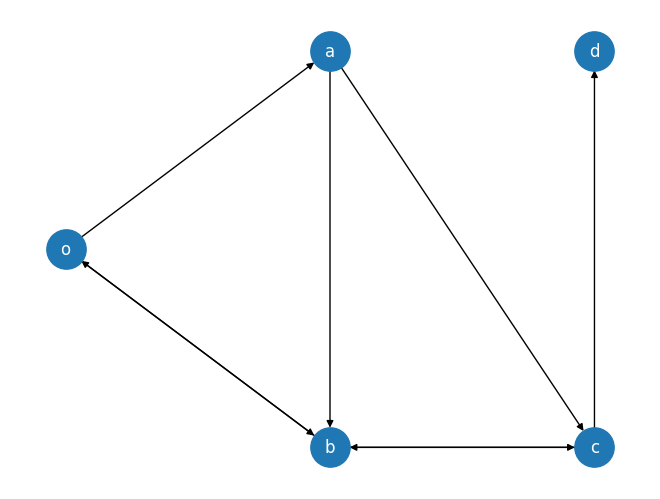

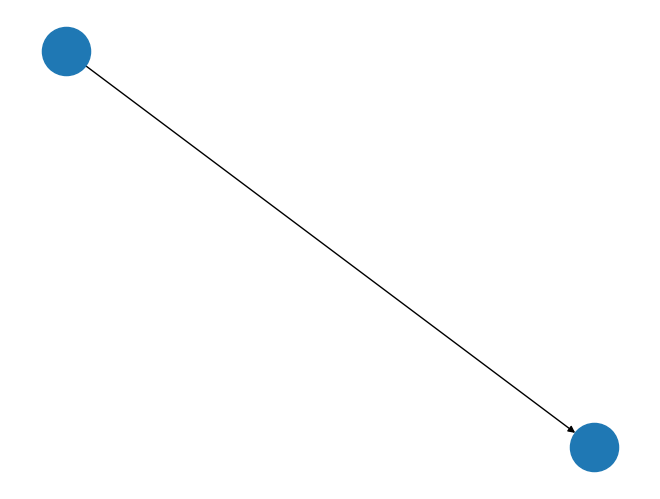

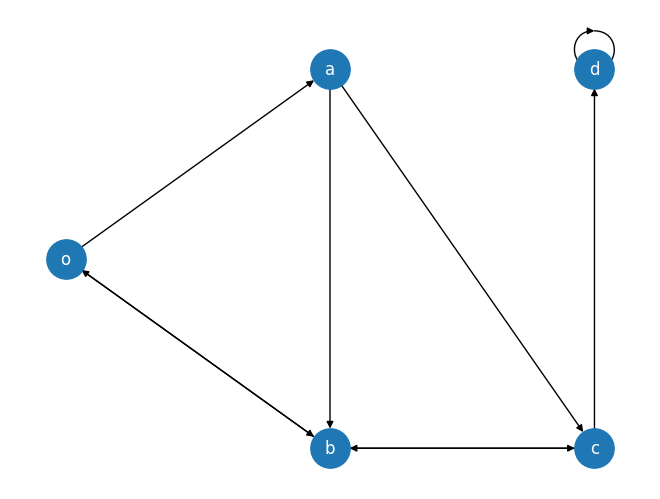

In [ ]:
# Point G (1)

G2 = G.copy()
G2.remove_edges_from([('d','a'),('d','c')])

plt.figure(1)
nx.draw(G2, pos, with_labels=True, font_color="white", node_size=800)

print("Is G aperiodic?", nx.is_aperiodic(G2))
print("Is G strongly connected?", nx.is_strongly_connected(G2))
print("We can't use French De-Groot")

W = nx.adjacency_matrix(G2).toarray()
print("W", W)
# W is singular -> we can't calculate P
# To bypass this issue, we have to add a self loop on 'd'
plt.figure(2)
CG = nx.algorithms.components.condensation(G2)
nx.draw(CG, node_size=1200)

G2.add_weighted_edges_from([('d','d',1)])
W = nx.adjacency_matrix(G2).toarray()
print("Added self-loop in d, new W:\n", W)

plt.figure(3)
nx.draw(G2, pos, with_labels=True, font_color="white", node_size=800)

degrees = np.sum(W,axis=1)
D = np.diag(degrees)
print(np.linalg.inv(D))
P = np.linalg.inv(D) @ W
print(P)

for i in range(10):
  x0 = rand(5) # Arbitrary initial condition
  x = x0

  for j in range(100):
    x = P @ x

  print(f"{i}: x(0): {x0}, x: {x}")

# Calculating invariant distribution. This time

# P^t for t->inf will converge to a matrix where al the rows are the same, equal lto the invariant distribution pi
# Invariant distribution
for _ in range(1000):
  P = P@P

pi = P[0, :]

print("pi: ", pi)

Is G aperiodic? True
Is G strongly connected? False
We can't use French De-Groot


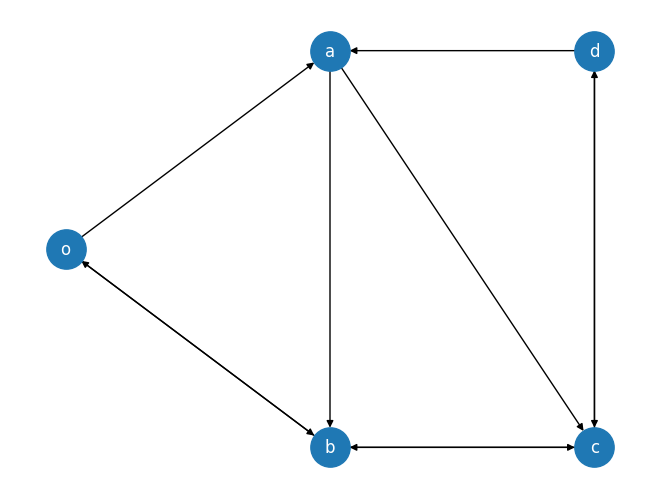

Strongly connected components
{'c', 'd'}
{'b', 'o', 'a'}


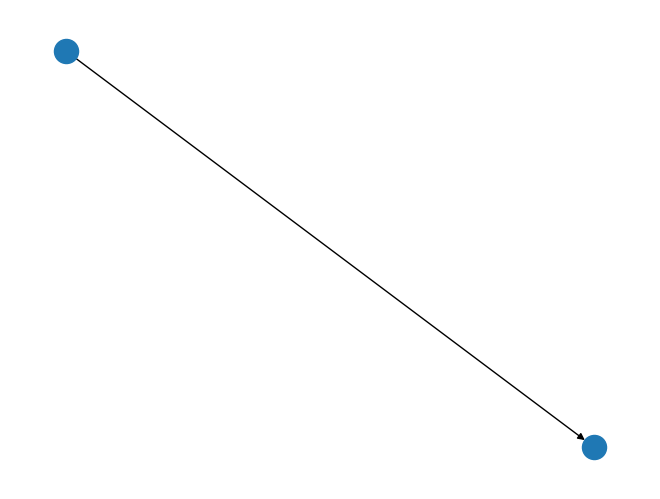

0
1
0: x(0): [0.05432262 0.04617311 0.6868317  0.57137578 0.77861426], x: [0.66557509 0.66557509 0.72209467 0.57137578 0.77861426]
1: x(0): [0.71210835 0.47101012 0.40814503 0.67991761 0.56295799], x: [0.62675415 0.62675415 0.59485607 0.67991761 0.56295799]
2: x(0): [0.98715168 0.92890373 0.69393131 0.51726254 0.48917402], x: [0.50449503 0.50449503 0.49683453 0.51726254 0.48917402]
3: x(0): [0.79071339 0.34780333 0.22293735 0.14771556 0.4495457 ], x: [0.28491108 0.28491108 0.36722839 0.14771556 0.4495457 ]
4: x(0): [0.66117024 0.90504705 0.55442026 0.65587323 0.66449041], x: [0.65979013 0.65979013 0.66214027 0.65587323 0.66449041]
5: x(0): [0.34167771 0.13693848 0.53099418 0.58415907 0.29566466], x: [0.45302524 0.45302524 0.37434495 0.58415907 0.29566466]
6: x(0): [0.24093722 0.23225747 0.08250926 0.44370007 0.54636755], x: [0.4903671  0.4903671  0.51836733 0.44370007 0.54636755]
7: x(0): [0.2330836  0.69838139 0.68975419 0.80927175 0.89116306], x: [0.84649507 0.84649507 0.86882907 0.8

In [ ]:
# Point H

G3 = G.copy()
G3.remove_edges_from([('c','b'), ('d','a')])

print("Is G aperiodic?", nx.is_aperiodic(G3))
print("Is G strongly connected?", nx.is_strongly_connected(G3))
print("We can't use French De-Groot")

A = nx.adjacency_matrix(G3)

W = A.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

pos = {
    'o': (0, 0),
    'a': (20, 20),
    'b': (20, -20),
    'c': (40, -20),
    'd': (40, 20),
}

plt.figure(1)
nx.draw(G, pos, with_labels=True, font_color="white", node_size=800)
plt.show()

print("Strongly connected components")
for scc in nx.strongly_connected_components(G3):
  print(scc)

CG = nx.algorithms.components.condensation(G3)
plt.figure(2)
nx.draw(CG)
plt.show()

for components in CG:
  print(components)


# Calculating invariant distribution
# w,v = np.linalg.eig(P.T)

# for index in [i for i in range(len(G)) if np.isclose(w[i],1)]:
#     pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
#     pi = pi/np.sum(pi)
#     print("pi: ", pi)

for i in range(10):
  x0 = rand(5) # Arbitrary initial condition
  x = x0

  for j in range(1000):
    x = P @ x

  print(f"{i}: x(0): {x0}, x: {x}")

# Describe how the asymptotic behaviour of the dynamics varies in terms of the initial condition x(0)
# look at the theorem "Asymptotics of French-De Groot learning model"
# alpha = pi' * x(0)

for _ in range(1000):
  P = P@P

pi = P[0, :]

print("pi: ", pi)

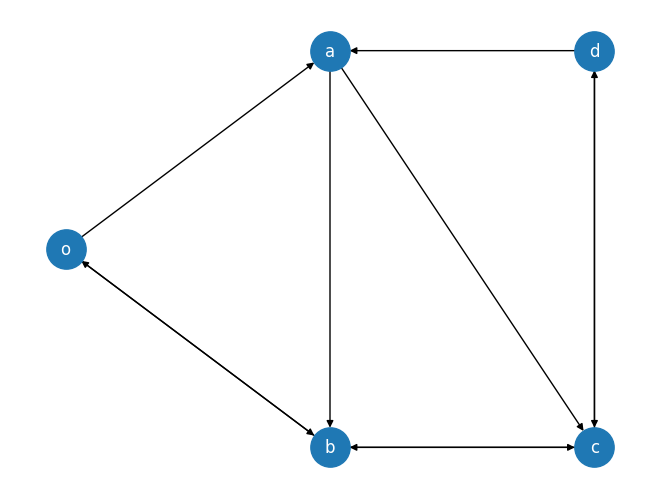

In [ ]:
# PROBLEM 2

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand, uniform

G = nx.DiGraph()

G.add_edge('o','a', weight=2/5)
G.add_edge('o','b', weight=1/5)
G.add_edge('a','b', weight=3/4)
G.add_edge('a','c', weight=1/4)
G.add_edge('b','o', weight=1/2)
G.add_edge('b','c', weight=1/3)
G.add_edge('c','b', weight=1/3)
G.add_edge('c','d', weight=2/3)
G.add_edge('d','a', weight=1/3)
G.add_edge('d','c', weight=1/3)

pos = {
    'o': (0, 0),
    'a': (20, 20),
    'b': (20, -20),
    'c': (40, -20),
    'd': (40, 20),
}

A=np.array([[0,2/5,1/5,0,0],
            [0,0,3/4,1/4,0],
            [1/2,0,0,1/3,0],
            [0,0,1/3,0,2/3],
            [0,1/3,0,1/3,0]])

w= np.sum(A,1)
D= np.diag(w)
P= np.linalg.inv(D) @ A

nx.draw(G, pos, with_labels=True, font_color="white", node_size=800)
plt.show()



In [ ]:
# point a

particles=[]

for _ in range(100):

  _, times= randomWalk('b', 0,True)
  particles.append(np.sum(times))

avg= np.mean(particles)
print("average return for 100 particles: ",avg)


average return for 100 particles:  4.929843477565424



average number of particles in o:  22.149054692775152
average number of particles in a:  14.75050641458474
average number of particles in b:  26.413065496286293
average number of particles in c:  18.031060094530723
average number of particles in d:  18.656313301823094 



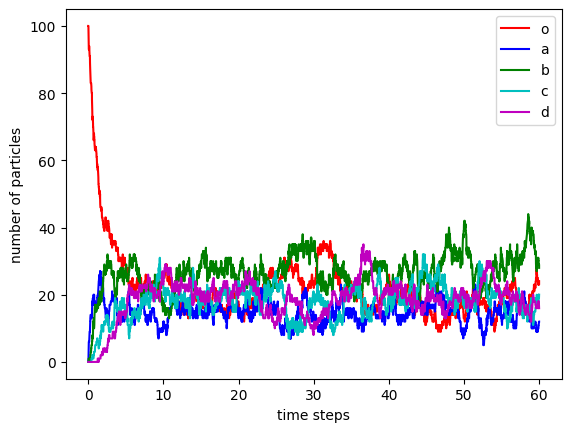

particles distribution over nodes after 60s:  [0.24 0.12 0.28 0.2  0.16]
pibar:  [0.2173913 +0.j 0.14906832+0.j 0.26086957+0.j 0.1863354 +0.j
 0.1863354 +0.j]


In [ ]:
# point b

import matplotlib.pyplot as plt
import numpy as np


def randomWalk_globalClock(xi, nparticles, stop_time, wstar):

  timer=0
  times=[]
  nodes_distr={'o':[],'a':[],'b':[],'c':[],'d':[]}

  for key in nodes_distr:
    if key == xi:
      nodes_distr[key].append(nparticles)
    else:
      nodes_distr[key].append(0)

  times.append(timer)

  while True:
    u= uniform(0.001,1)
    tnext= -np.log(u)/(wstar*nparticles)   # global rate is wstar*nparticles
    timer += tnext
    if timer >= stop_time or nparticles == 0:
      return nodes_distr, times
    times.append(timer)
    curr_nodes=[]
    for key in nodes_distr:
      curr_nodes.append(nodes_distr[key][-1])
    pn= np.array(curr_nodes)/nparticles
    target_node= choice(list(nodes_distr.keys()),1,p=list(pn))[0]

    tn_index= list(G.nodes).index(target_node)
    dest_node= choice(list(nodes_distr.keys()),1,p=Pbar[tn_index,:])[0]

    if dest_node == target_node:
      for key in nodes_distr:
        last= nodes_distr[key][-1]
        nodes_distr[key].append(last)
    else:
      for key in nodes_distr:
        last= nodes_distr[key][-1]
        if key == target_node:
          nodes_distr[key].append(last-1)
        elif key == dest_node:
          nodes_distr[key].append(last+1)
        else:
          nodes_distr[key].append(last)


nodes_distr={}
nodes_distr, times = randomWalk_globalClock('o', 100, 60, 1)
lists= list(nodes_distr.values())
node_o= lists[0]
node_a= lists[1]
node_b= lists[2]
node_c= lists[3]
node_d= lists[4]

# proof that for every time step the sum over all nodes is 100

''' mat= np.vstack([node_o,node_a,node_b,node_c,node_d])
sums=np.sum(mat,0)
print(sums) '''

avg_o= np.mean(node_o)
avg_a= np.mean(node_a)
avg_b= np.mean(node_b)
avg_c= np.mean(node_c)
avg_d= np.mean(node_d)

print("\naverage number of particles in o: ",avg_o)
print("average number of particles in a: ",avg_a)
print("average number of particles in b: ",avg_b)
print("average number of particles in c: ",avg_c)
print("average number of particles in d: ",avg_d,"\n")

fig, axs= plt.subplots()
axs.plot(times,node_o,'r')
axs.plot(times,node_a,'b')
axs.plot(times,node_b,'g')
axs.plot(times,node_c,'c')
axs.plot(times,node_d,'m')
axs.legend(['o','a','b','c','d'])
plt.xlabel('time steps')
plt.ylabel('number of particles')
plt.show()


distr= np.array([node_o[-1], node_a[-1], node_b[-1], node_c[-1], node_d[-1]])/100
print("particles distribution over nodes after 60s: ",distr)
print("pibar: ",pibar)



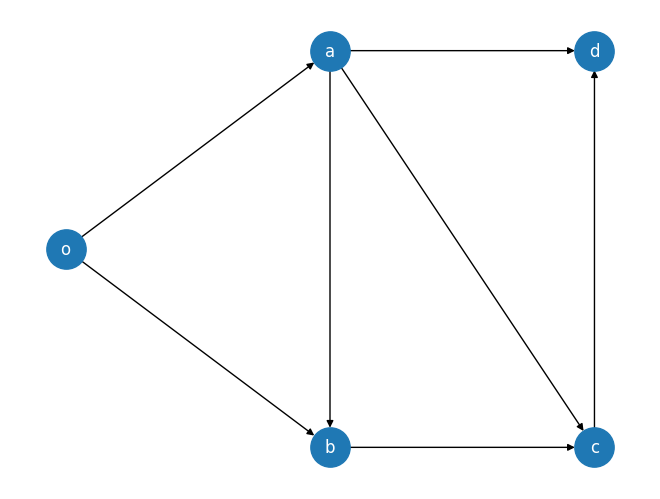

In [ ]:
# PROBLEM 3

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand, uniform


G= nx.DiGraph()

G.add_weighted_edges_from([('o','a',3/4), ('o','b',3/4), ('a','b',1/4), ('a','c',1/4), ('a','d',2/4), ('b','c',1), ('c','d',1)])

pos = {
    'o': (0, 0),
    'a': (20, 20),
    'b': (20, -20),
    'c': (40, -20),
    'd': (40, 20),
}

nx.draw(G, pos, with_labels=True, font_color="white", node_size=800)
plt.show()


A= np.array([[0,3/4,3/4,0,0],
             [0,0,1/4,1/4,2/4],
             [0,0,0,1,0],
             [0,0,0,0,1],
             [0,0,0,0,0]])
w= np.sum(A,1)
w[-1]=2
D= np.diag(w)
P= np.linalg.inv(D) @ A
wstar= np.max(w)
Pbar= np.zeros((5,5))
for i in range(5):
  sum=0
  for j in range(5):
    if i != j:
      Pbar[i][j]= A[i][j]/wstar
      sum += Pbar[i][j]
  Pbar[i][i] = 1-sum



In [ ]:
# point a

def randomWalk_globalClock_prop(stop_time, wstar, input_rate):

  timer=0
  times=[]
  nodes_distr={'o':[],'a':[],'b':[],'c':[],'d':[]}
  nparticles=0

  for key in nodes_distr:
      nodes_distr[key].append(0)

  times.append(timer)

  while True:
    nodes_rate = nparticles * wstar

    # processing probabilities for one rate between the two to happen
    input_before_nodes= choice([True, False],1,p=[ input_rate/(input_rate+nodes_rate), nodes_rate/(input_rate+nodes_rate)])
    u= uniform(0.001,1)
    if input_before_nodes:
      tnext= -np.log(u)/input_rate
    else:
      tnext= -np.log(u)/nodes_rate
    timer += tnext
    if timer >= stop_time:
      return nodes_distr, times
    times.append(timer)

    # input clock wins, one more particle in 'o'
    if input_before_nodes:
      nparticles += 1
      for key in nodes_distr:
        last= nodes_distr[key][-1]
        if key == 'o':
          nodes_distr[key].append(last+1)
        else:
          nodes_distr[key].append(last)

    # nodes global clock wins, choose proportionally the node to start the transition from and then apply the probabilities given by Pbar to move the particle
    else:
      if nparticles == 0:   # no particles left to move, go to next iteration until input clock ticks earlier
        for key in nodes_distr:
          nodes_distr[key].append(nodes_distr[key][-1])
        continue

      curr_nodes=[]
      for key in nodes_distr:
        curr_nodes.append(nodes_distr[key][-1])
      pn= np.array(curr_nodes)/np.sum(np.array(curr_nodes))
      target_node= choice(list(nodes_distr.keys()),1,p=list(pn))[0]

      if nodes_distr[target_node][-1] == 0:
        for key in nodes_distr:
          nodes_distr[key].append(nodes_distr[key][-1])
        continue

      if target_node == 'd':    # if 'd' is chosen then a particle exits the network
        nparticles-=1
        for key in nodes_distr:
          last= nodes_distr[key][-1]
          if key == 'd':
            nodes_distr[key].append(last-1)
          else:
            nodes_distr[key].append(last)

      else:   # node other than d, perform the transition, number of particles remains still
        tn_index= list(G.nodes).index(target_node)
        dest_node= choice(list(G.nodes),1,p=Pbar[tn_index,:])[0]
        if dest_node == target_node:
          for key in nodes_distr:
            last= nodes_distr[key][-1]
            nodes_distr[key].append(last)
        else:
          for key in nodes_distr:
            last= nodes_distr[key][-1]
            if key == target_node:
              nodes_distr[key].append(last-1)
            elif key == dest_node:
              nodes_distr[key].append(last+1)
            else:
              nodes_distr[key].append(last)

nodes_distr, times = randomWalk_globalClock_prop(60,wstar,100)
lists= list(nodes_distr.values())
node_o= lists[0]
node_a= lists[1]
node_b= lists[2]
node_c= lists[3]
node_d= lists[4]

fig, axs= plt.subplots()
axs.plot(times,node_o,'r')
axs.plot(times,node_a,'b')
axs.plot(times,node_b,'g')
axs.plot(times,node_c,'c')
axs.plot(times,node_d,'m')
axs.legend(['o','a','b','c','d'])
plt.xlabel('time steps')
plt.ylabel('number of particles')
plt.show()

distr= np.array([node_o[-1], node_a[-1], node_b[-1], node_c[-1], node_d[-1]])
print("particles distribution over nodes at the end: ",distr)


In [ ]:
# point b

def randomWalk_localClocks_fix(stop_time, input_rate):

    timer=0
    times=[]
    nodes_distr={'o':[],'a':[],'b':[],'c':[],'d':[]}
    nparticles=0

    for key in nodes_distr:
        nodes_distr[key].append(0)

    times.append(timer)

    while True:
        tnexts = []
        for rate in w:
            u = uniform(0.000001,1.000001)
            tnexts.append(-np.log(u)/rate)
        u = uniform(0.000001,1.000001)
        tnexts.append(-np.log(u)/input_rate)
        tnexts = np.array(tnexts)
        tnext = np.min(tnexts)
        idx = np.argmin(tnexts)
        timer+=tnext
        if timer>= stop_time:
            return (nodes_distr, times)
        times.append(timer)

        if idx == 5: #input rate
            nparticles+=1
            for key in nodes_distr:
                last = nodes_distr[key][-1]
                if key == 'o':
                    nodes_distr[key].append(last+1)
                else:
                    nodes_distr[key].append(last)
        elif idx == 4: #take out particle
            for key in nodes_distr:
                last = nodes_distr[key][-1]
                if key == 'd':
                    if nodes_distr[key][-1] == 0:
                        nodes_distr[key].append(last)
                    else:
                        nodes_distr[key].append(last-1)
                else:
                    nodes_distr[key].append(last)
        else: #other node
            dest_node= choice(list(G.nodes),1,p=P[idx,:])[0]
            target_node = list(G.nodes)[idx]
            if nodes_distr[target_node][-1] == 0:
                for key in nodes_distr:
                    last = nodes_distr[key][-1]
                    nodes_distr[key].append(last)
            else:
                for key in nodes_distr:
                    last= nodes_distr[key][-1]
                    if key == target_node:
                        nodes_distr[key].append(last-1)
                    elif key == dest_node:
                        nodes_distr[key].append(last+1)
                    else:
                        nodes_distr[key].append(last)

nodes_distr, times = randomWalk_localClocks_fix(60,1.5)
lists= list(nodes_distr.values())
node_o= lists[0]
node_a= lists[1]
node_b= lists[2]
node_c= lists[3]
node_d= lists[4]

fig, axs= plt.subplots()
axs.plot(times,node_o,'r')
axs.plot(times,node_a,'b')
axs.plot(times,node_b,'g')
axs.plot(times,node_c,'c')
axs.plot(times,node_d,'m')
axs.legend(['o','a','b','c','d'])
plt.xlabel('time steps')
plt.ylabel('number of particles')
plt.show()

distr= np.array([node_o[-1], node_a[-1], node_b[-1], node_c[-1], node_d[-1]])
print("particles distribution over nodes at the end: ",distr)


